In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive  Shareddrives


In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.5)

In [ ]:
#EDA
import csv as csv_package
import os
import re

import pandas as pd
import random
import numpy as np

from tqdm import tqdm
from pathlib import Path
from numpy import append
from collections import defaultdict
df = pd.read_csv('/content/drive/MyDrive/DS1030 final project/melb_data.csv')
df.describe().transpose()
print(df.head())
print("the shape of the dataframe is:", df.shape)
print(df.columns)
print(df.dtypes)


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h 1480000.00      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h 1035000.00      S  Biggin   
2  Abbotsford      5 Charles St      3    h 1465000.00     SP  Biggin   
3  Abbotsford  40 Federation La      3    h  850000.00     PI  Biggin   
4  Abbotsford       55a Park St      4    h 1600000.00     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016      2.50   3067.00  ...      1.00 1.00    202.00           NaN   
1  4/02/2016      2.50   3067.00  ...      1.00 0.00    156.00         79.00   
2  4/03/2017      2.50   3067.00  ...      2.00 0.00    134.00        150.00   
3  4/03/2017      2.50   3067.00  ...      2.00 1.00     94.00           NaN   
4  4/06/2016      2.50   3067.00  ...      1.00 2.00    120.00        142.00   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

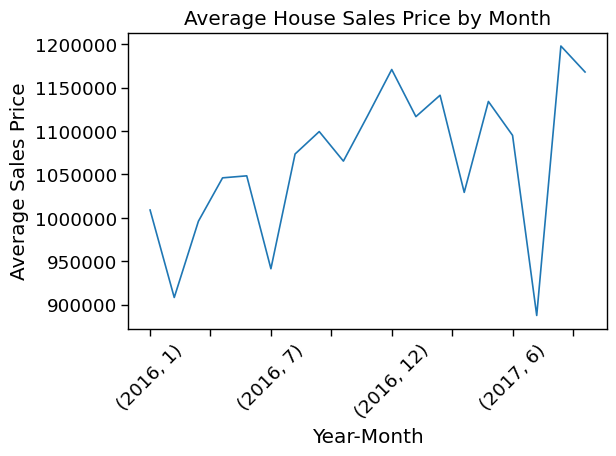

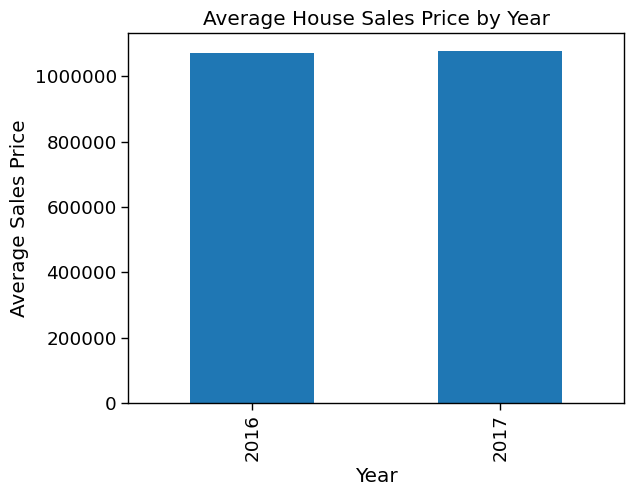

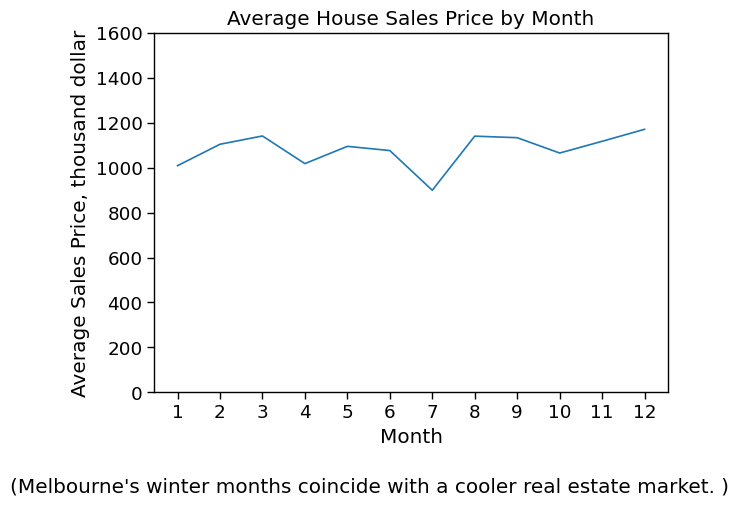

In [ ]:
#data cleansing - time-related variable
import matplotlib.pyplot as plt
df['Price_aj']=df['Price']/1000

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)


df['Year'] = df['Date'].dt.year
df['MonthSold'] = df['Date'].dt.month

average_prices_by_month = df.groupby(['Year', 'MonthSold'])['Price'].mean()


# Plotting by month-year
average_prices_by_month.plot(kind='line', title='Average House Sales Price by Month')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Average Sales Price')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting by year
average_prices_by_year = df.groupby('Year')['Price'].mean()
average_prices_by_year.plot(kind='bar', title='Average House Sales Price by Year')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Average Sales Price')
plt.show()

# recode "Date" variable into 12 categories by month, plot it

average_prices_by_month2 = df.groupby(['MonthSold'])['Price_aj'].mean()
average_prices_by_month2.plot(kind='line', title='Average House Sales Price by Month')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(ticks=range(1, 13))
plt.ylim(0, 1600)
plt.ylabel('Average Sales Price, thousand dollar')
plt.xlabel('Month')
txt = "(Melbourne's winter months coincide with a cooler real estate market. )"
plt.figtext(0.5, -0.05, txt, ha='center')
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Price_aj', 'Year',
       'MonthSold'],
      dtype='object')
Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           

In [ ]:
#Y variable - price
#df['Price'].value_counts()
pd.set_option('display.float_format', '{:.2f}'.format)
df['Price'].describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

In [ ]:
#group structure - neighborhood
pd.set_option('display.float_format', '{:.2f}'.format)
df['Suburb'].describe()

count         13580
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object

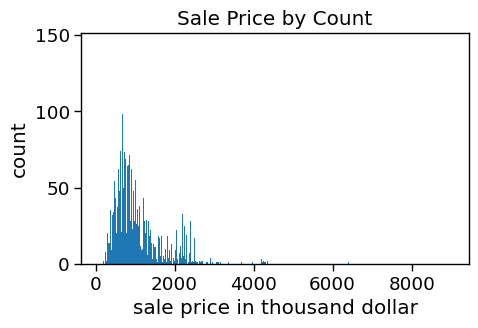

In [ ]:
#visualization - Y distribution

#price
plt.figure(figsize=(5,3))

df['Price_aj'].plot.hist(bins = df['Price_aj'].nunique())
plt.xlabel('sale price in thousand dollar')
plt.ylabel('count')
plt.title('Sale Price by Count')
plt.show()


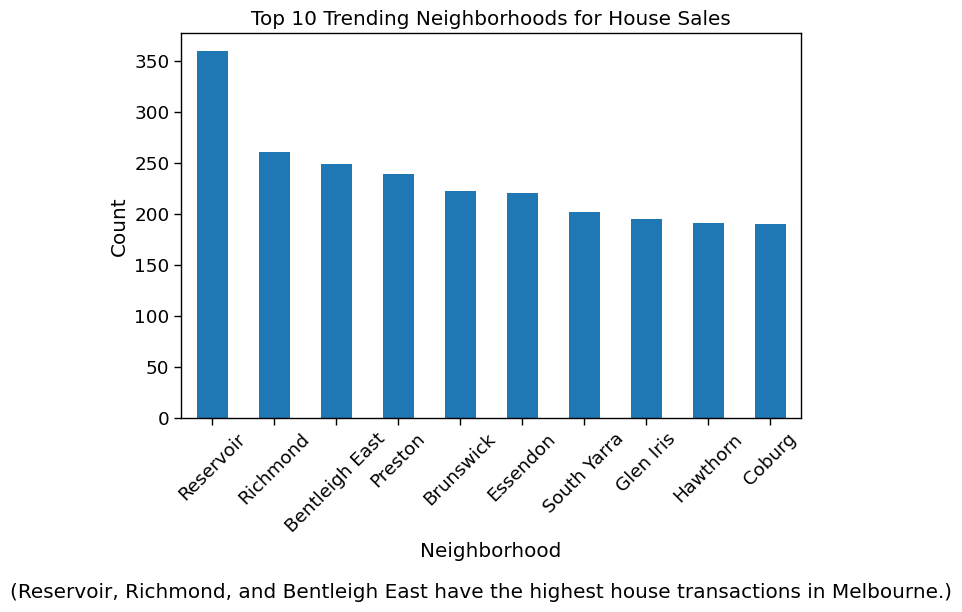

In [ ]:
#neighborhood by house sale count
N = 10
top_categories = df['Suburb'].value_counts().head(N).index


df['Suburb_aj'] = df['Suburb'].where(df['Suburb'].isin(top_categories), 'Other')
filtered_counts = df['Suburb_aj'].value_counts()
filtered_counts = filtered_counts[filtered_counts.index != 'Other']

plt.figure(figsize=(8,5))
filtered_counts.plot.bar()
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 10 Trending Neighborhoods for House Sales')
plt.xticks(rotation=45)
txt = "(Reservoir, Richmond, and Bentleigh East have the highest house transactions in Melbourne.)"
plt.figtext(0.5, -0.25, txt, ha='center')
plt.show()


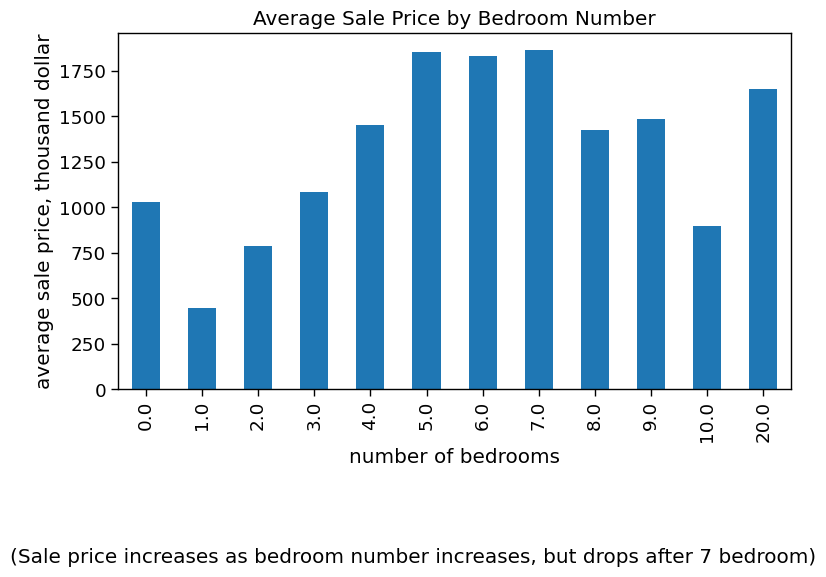

In [ ]:
import matplotlib.pyplot as plt

#sale price vs. bedroom number

avg_prices = df.groupby('Bedroom2')['Price_aj'].mean().sort_index()

avg_prices.plot(kind='bar', figsize=(8, 5))
plt.ylabel('average sale price, thousand dollar')
plt.xlabel('number of bedrooms')
plt.title('Average Sale Price by Bedroom Number')
txt = "(Sale price increases as bedroom number increases, but drops after 7 bedroom)"
plt.figtext(0.5, -0.15, txt, ha='center')
plt.tight_layout()
plt.show()


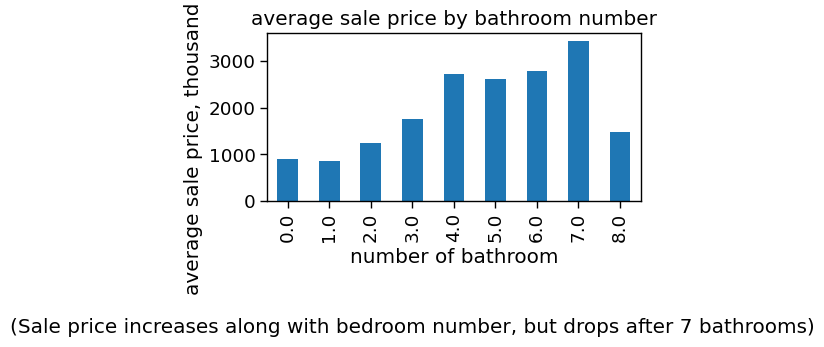

In [ ]:

#sale price vs. bathroom number

avg_prices = df.groupby('Bathroom')['Price_aj'].mean().sort_index()


avg_prices.plot(kind='bar', figsize=(5, 3))
plt.ylabel('average sale price, thousand dollar')
plt.xlabel('number of bathroom')
plt.title('average sale price by bathroom number')
txt = "(Sale price increases along with bedroom number, but drops after 7 bathrooms)"
plt.figtext(0.5, -0.15, txt, ha='center')
plt.tight_layout()
plt.show()

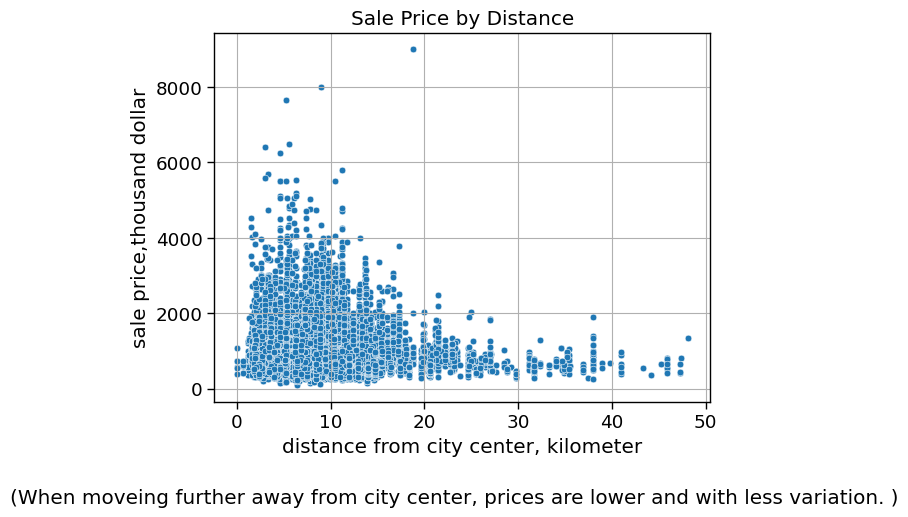

In [ ]:
#sale price by distnace to city center
import seaborn as sns
sns.scatterplot(x=df['Distance'], y=df['Price_aj'])
plt.title('Sale Price by Distance')
plt.xlabel('distance from city center, kilometer')
plt.ylabel('sale price,thousand dollar')
txt = "(When moveing further away from city center, prices are lower and with less variation. )"
plt.figtext(0.5, -0.1, txt, ha='center')
plt.grid(True)
plt.show()

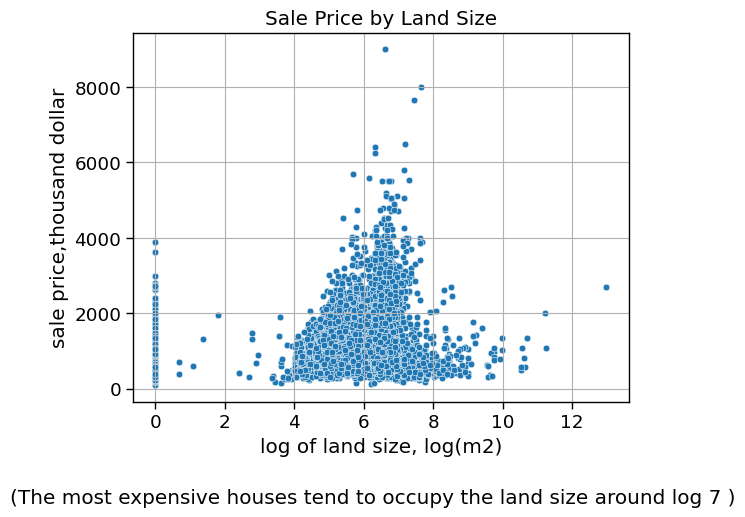

In [ ]:
#Sale Price by Land Size

df['Log_Landsize'] = np.log(df['Landsize'] + 1)

sns.scatterplot(x=df['Log_Landsize'], y=df['Price_aj'])
plt.title('Sale Price by Land Size')
plt.xlabel('log of land size, log(m2)')
plt.ylabel('sale price,thousand dollar')
txt = "(The most expensive houses tend to occupy the land size around log 7 )"
plt.figtext(0.5, -0.1, txt, ha='center')
plt.grid(True)
plt.show()


In [ ]:
# Read the data
df.drop(columns=['Address', 'Date', 'Price_aj','Year','Suburb_aj','Log_Landsize'], inplace=True)
df.shape

(13580, 20)

In [ ]:
# Splitting
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.utils import shuffle


def create_splits(df):

    data = shuffle(df, random_state=42).reset_index(drop=True)

    unique_suburbs = data['Suburb'].unique()
    train_suburbs, test_suburbs = train_test_split(unique_suburbs, test_size=0.2, random_state=4)


    train_data = data[data['Suburb'].isin(train_suburbs)]
    test_data = data[data['Suburb'].isin(test_suburbs)]

    gkf = GroupKFold(n_splits=4)

    train_val_splits = list(gkf.split(train_data, groups=train_data['Suburb']))

    X_trains, y_trains, X_vals, y_vals = [], [], [], []

    # Split the data for training and validation datasets
    for train_idx, val_idx in train_val_splits:
        train_dataset = train_data.iloc[train_idx]
        val_dataset = train_data.iloc[val_idx]
        X_trains.append(train_dataset.drop(columns=["Price"]))
        y_trains.append(train_dataset["Price"])
        X_vals.append(val_dataset.drop(columns=["Price"]))
        y_vals.append(val_dataset["Price"])

    X_test = test_data.drop(columns=["Price"])
    y_test = test_data["Price"]

    return (X_trains, y_trains, X_vals, y_vals), (X_test, y_test)


(X_trains, y_trains, X_vals, y_vals), (X_test, y_test) = create_splits(df)



records_info = []

for i in range(4):  # Since there are 4 splits
    info = {
        "Split": i+1,
        "X_train": len(X_trains[i]),
        "y_train": len(y_trains[i]),
        "X_val": len(X_vals[i]),
        "y_val": len(y_vals[i]),
        "X_test": len(X_test),
        "y_test": len(y_test)
    }
    records_info.append(info)

records_info_df = pd.DataFrame(records_info)
records_info_df


,Split,X_train,y_train,X_val,y_val,X_test,y_test
0,1,8191,8191,2731,2731,2658,2658
1,2,8191,8191,2731,2731,2658,2658
2,3,8192,8192,2730,2730,2658,2658
3,4,8192,8192,2730,2730,2658,2658


In [ ]:
# shapes of X_train and X_val

if len(X_trains) != len(X_vals):
    raise ValueError("X_trains and X_evals should have the same length.")

data = {
    'Split': list(range(len(X_trains))),
    'X_train': [(train_item.shape[0], train_item.shape[1]) for train_item in X_trains],
    'X_val': [(eval_item.shape[0], eval_item.shape[1]) for eval_item in X_vals]
}

shapes_df = pd.DataFrame(data)
shapes_df



,Split,X_train,X_val
0,0,"(8191, 19)","(2731, 19)"
1,1,"(8191, 19)","(2731, 19)"
2,2,"(8192, 19)","(2730, 19)"
3,3,"(8192, 19)","(2730, 19)"


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#preprocessing pipeline

ordinal_ftrs = ['MonthSold']
cat_ftrs = ['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea', 'Regionname']
num_ftrs = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt','Lattitude', 'Longtitude', 'Propertycount']




# categorical encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])


# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value=0)),
    ('ordinal',   OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])


# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [ ]:
#store data
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data for all four splits
X_trains_prep, X_vals_prep = [], []



for i in range(4):
    X_train_prep = clf.fit_transform(X_trains[i])
    X_val_prep = clf.transform(X_vals[i]) #need to also transform test data
    X_trains_prep.append(X_train_prep)
    X_vals_prep.append(X_val_prep)

df_test = clf.transform(X_test)

# Extract and print the shapes of X_trains_prep and X_vals_prep
shapes_info = {
    "Split": list(range(1, 5)),
    "X_train_prep": [x.shape for x in X_trains_prep],
    "X_val_prep": [x.shape for x in X_vals_prep]
}

shapes_df = pd.DataFrame(shapes_info)
shapes_df


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

,Split,X_train_prep,X_val_prep
0,1,"(8191, 609)","(2731, 609)"
1,2,"(8191, 605)","(2731, 605)"
2,3,"(8192, 608)","(2730, 608)"
3,4,"(8192, 610)","(2730, 610)"


In [ ]:
df_test.shape

(2658, 610)

In [ ]:
# missing data description after preprocessing

# X_train_prep
missing_data = np.isnan(X_train_prep).sum(axis=0)

# Features with missing values and count
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their count:")
for idx, count in enumerate(columns_with_missing):
    print(f"Column {idx}: {count} missing values")

# Fraction of rows
fraction_rows_with_missing = np.any(np.isnan(X_train_prep), axis=1).mean()
print(f"\nFraction of rows with missing values: {fraction_rows_with_missing:.2%}")

# Fraction of columns
fraction_cols_with_missing = np.any(np.isnan(X_train_prep), axis=0).mean()
print(f"\nFraction of columns with missing values: {fraction_cols_with_missing:.2%}")

# Overall fraction
overall_fraction_missing = np.isnan(X_train_prep).mean()
print(f"\nOverall fraction of missing values: {overall_fraction_missing:.2%}")


Columns with missing values and their count:
Column 0: 33 missing values
Column 1: 3890 missing values
Column 2: 3235 missing values

Fraction of rows with missing values: 49.76%

Fraction of columns with missing values: 0.49%

Overall fraction of missing values: 0.14%
